##### Problem statement:
    
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion
matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [1]:
import pandas as pd
df= pd.read_csv('Diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [3]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree         float64
Age                int64
Outcome            int64
dtype: object

## Splitting dataset into training and testing datasets

In [4]:
x= df.drop("Outcome", axis='columns')
y= df.Outcome

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size= 0.2)

## Model training

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors= 5)
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [7]:
ypred= model.predict(xtest)
ypred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0])

## Accuracy of the model

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cm= confusion_matrix(ytest, ypred)
accuracy= accuracy_score(ytest, ypred)
precision= precision_score(ytest, ypred, average='micro')
recall= recall_score(ytest, ypred, average='micro')
cm

array([[76, 25],
       [25, 28]])

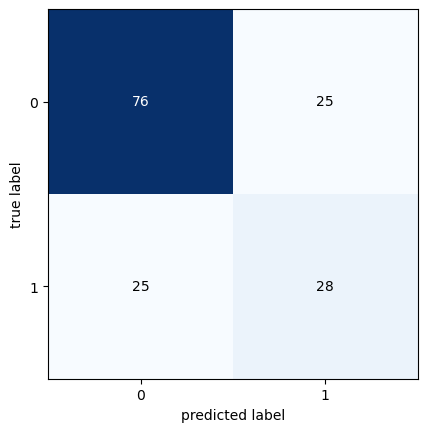

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(cm)
plt.show()

In [10]:
print('Accuracy: ',accuracy)
print('Error: ', 1-accuracy)
print('Precision', precision)
print('Recall', recall)

Accuracy:  0.6753246753246753
Error:  0.3246753246753247
Precision 0.6753246753246753
Recall 0.6753246753246753
